1. Import packages and read dataset

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [66]:
vehicle_fraud_data = pd.read_csv('fraud_oracle.csv', header = 0, sep=',')

In [67]:
vehicle_fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [68]:
vehicle_fraud_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

2. Is there any missing value ?

In [69]:
vehicle_fraud_data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [70]:
vehicle_fraud_data.describe(include='O')

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


3. Exploratory Data Analysis(EDA)

In [71]:
# fruad policy claimed
vehicle_fraud_data['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Text(0.5, 1.0, 'Bar Graph')

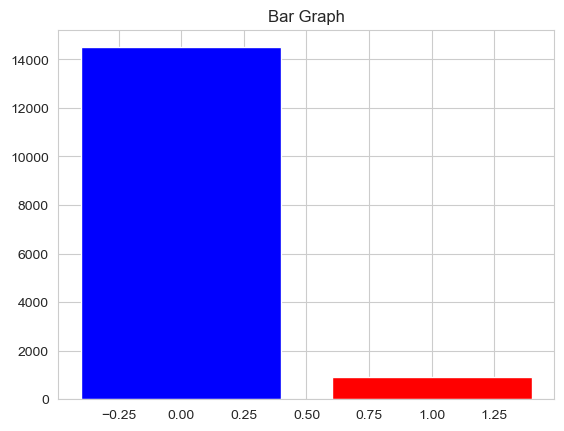

In [72]:
fraud_counts = vehicle_fraud_data['FraudFound_P'].value_counts()
plt.bar(x = vehicle_fraud_data['FraudFound_P'].value_counts().index,
        height = vehicle_fraud_data['FraudFound_P'].value_counts(),
        color = ['b', 'r'])
plt.title('Bar Graph')        

In [73]:
sns.set_style('whitegrid')
fraud_rate_by_price = vehicle_fraud_data.groupby('VehiclePrice')['FraudFound_P'].mean() * 100
fraud_rate_by_price = fraud_rate_by_price.sort_values()
categories = fraud_rate_by_price.index
values = fraud_rate_by_price.values

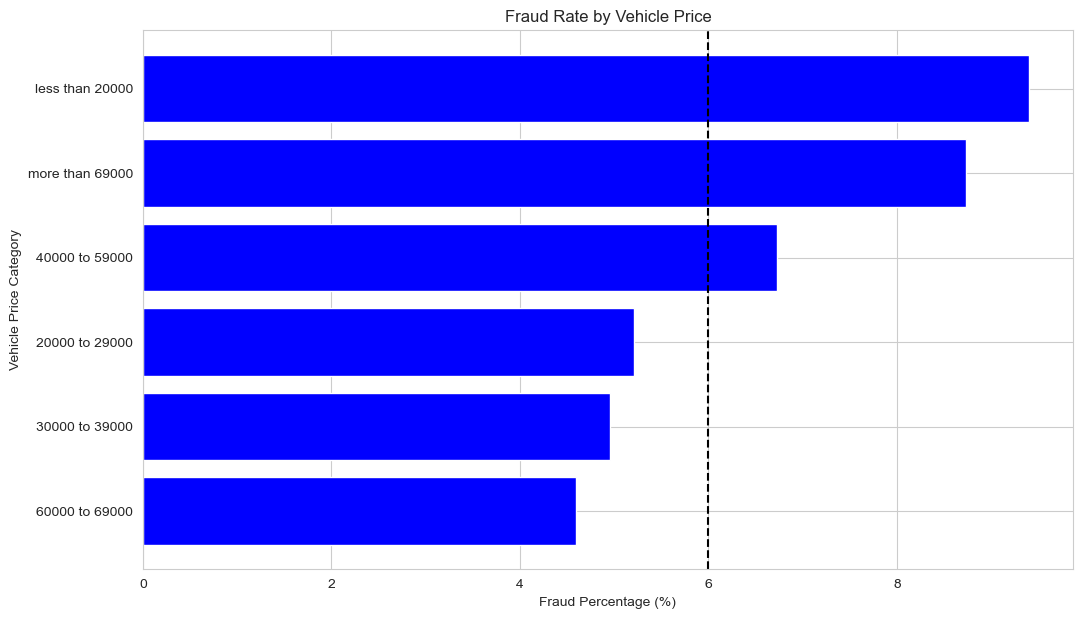

In [74]:
plt.figure(figsize=(12,7))
plt.barh(categories, values, color = 'b')
plt.xlabel('Fraud Percentage (%)')
plt.ylabel('Vehicle Price Category')
plt.title('Fraud Rate by Vehicle Price')
plt.axvline(6, linestyle = '--', color='k')
plt.show()

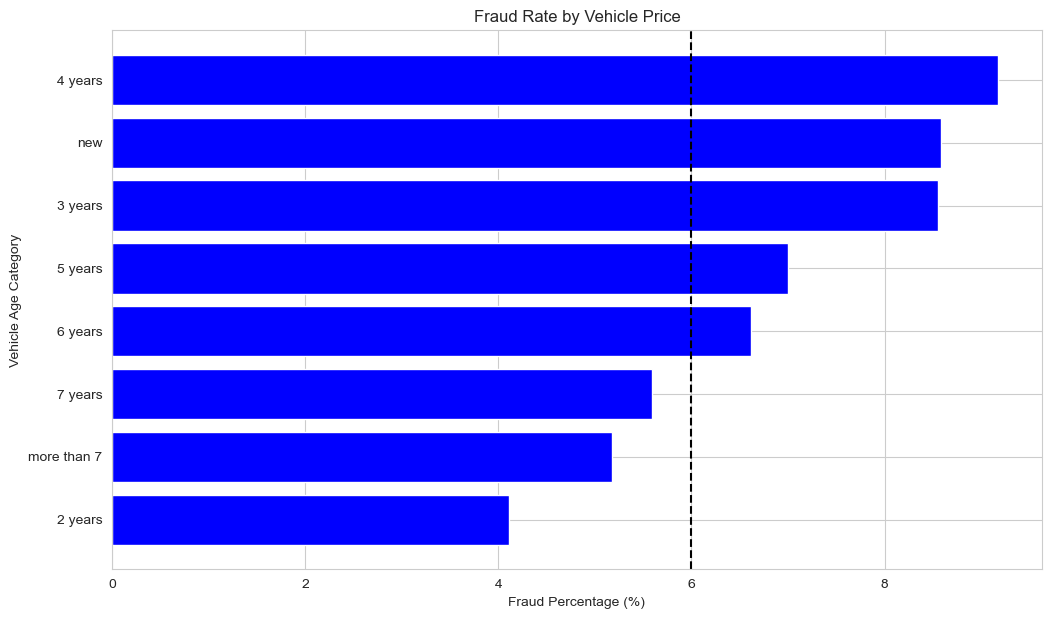

In [75]:
sns.set_style('whitegrid')
fraud_rate_by_price = vehicle_fraud_data.groupby('AgeOfVehicle')['FraudFound_P'].mean() * 100
fraud_rate_by_price = fraud_rate_by_price.sort_values()
categories = fraud_rate_by_price.index
values = fraud_rate_by_price.values

plt.figure(figsize=(12,7))
plt.barh(categories, values, color = 'b')
plt.xlabel('Fraud Percentage (%)')
plt.ylabel('Vehicle Age Category')
plt.title('Fraud Rate by Vehicle Price')
plt.axvline(6, linestyle = '--', color='k')
plt.show()

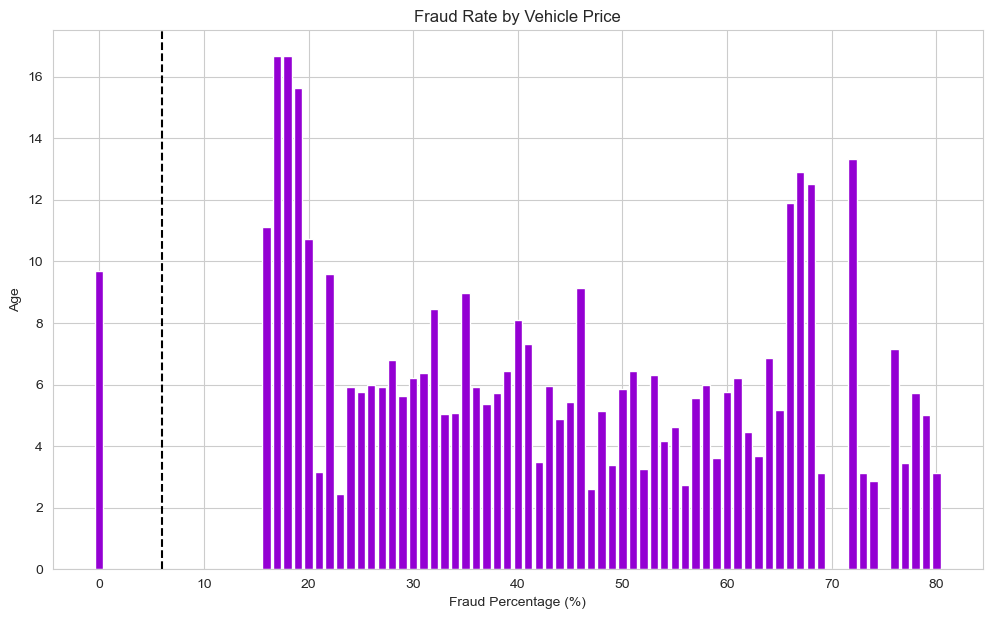

In [76]:
sns.set_style('whitegrid')
fraud_rate_by_price = vehicle_fraud_data.groupby('Age')['FraudFound_P'].mean() * 100
fraud_rate_by_price = fraud_rate_by_price.sort_values()
categories = fraud_rate_by_price.index
values = fraud_rate_by_price.values

plt.figure(figsize=(12,7))
plt.bar(categories, values, color = 'darkviolet')
plt.xlabel('Fraud Percentage (%)')
plt.ylabel('Age')
plt.title('Fraud Rate by Vehicle Price')
plt.axvline(6, linestyle = '--', color='k')
plt.show()

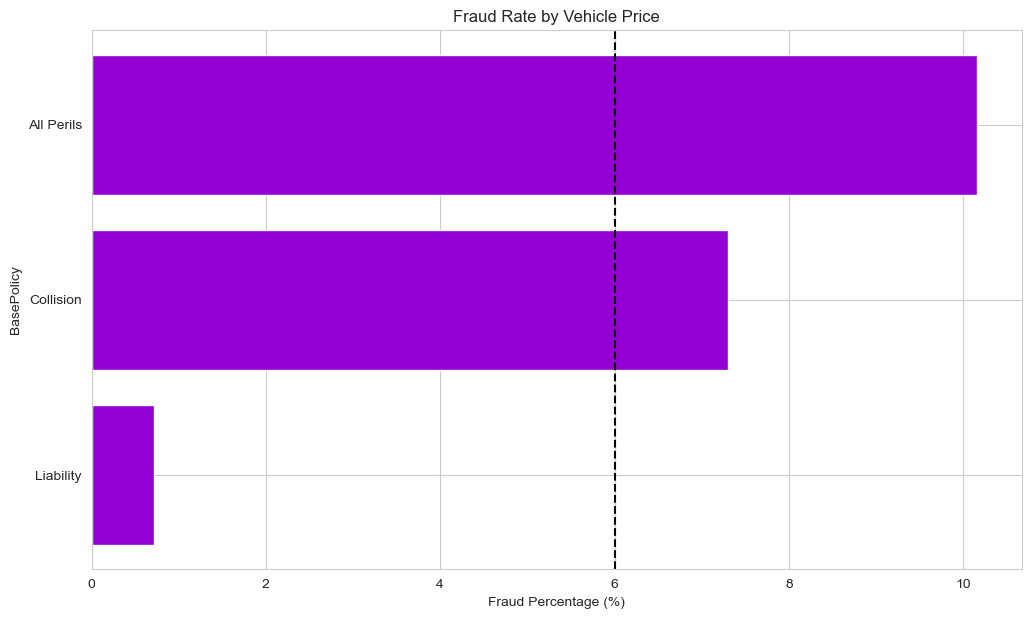

In [77]:
sns.set_style('whitegrid')
fraud_rate_by_price = vehicle_fraud_data.groupby('BasePolicy')['FraudFound_P'].mean() * 100
fraud_rate_by_price = fraud_rate_by_price.sort_values()
categories = fraud_rate_by_price.index
values = fraud_rate_by_price.values

plt.figure(figsize=(12,7))
plt.barh(categories, values, color = 'darkviolet')
plt.xlabel('Fraud Percentage (%)')
plt.ylabel('BasePolicy')
plt.title('Fraud Rate by Vehicle Price')
plt.axvline(6, linestyle = '--', color='k')
plt.show()

3. Data Preprocessing

In [78]:
vehicle_fraud_data['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64

In [79]:
vehicle_fraud_data[vehicle_fraud_data['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [80]:
vehicle_fraud_data.drop(1516, inplace=True)

In [81]:
vehicle_fraud_data['Age' ]= vehicle_fraud_data['Age'].replace(0, np.nan)

In [82]:
vehicle_fraud_data['Age'].isnull().sum() / vehicle_fraud_data.shape[0]

np.float64(0.02068876062001427)

In [83]:
vehicle_fraud_data.dropna(inplace=True)

In [84]:
binary_columns = [col for col in vehicle_fraud_data.columns if vehicle_fraud_data[col].nunique() == 2 and col != 'FraudFound_P']

In [85]:
binary_columns

['AccidentArea',
 'Sex',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType']

In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in binary_columns:
    vehicle_fraud_data[col] = encoder.fit_transform(vehicle_fraud_data[col])

In [87]:
useless_columns = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'PolicyNumber', 'Make', 'Year']
vehicle_fraud_data = vehicle_fraud_data.drop(useless_columns, axis = 1)

In [88]:
vehicle_fraud_data.groupby(['VehiclePrice'])['FraudFound_P'].mean().sort_values()*100

VehiclePrice
60000 to 69000     4.597701
30000 to 39000     4.954700
20000 to 29000     5.211041
40000 to 59000     6.724512
more than 69000    8.559047
less than 20000    9.406393
Name: FraudFound_P, dtype: float64

In [89]:
vehicleprice_label = {'20000 to 29000':0, '30000 to 39000':0, '40000 to 59000':1, '60000 to 69000':0, 'more than 69000':1, 'less than 20000':1}
basepolicy_label = {'Liability':0, 'Collision':1, 'All Perils': 2}
ageofvehicle_label = {'new': 2, '2 years': 0, '3 years': 2, '4 years': 2, '5 years': 1, '6 years': 1, '7 years': 0, 'more than 7':0}

In [90]:
vehicle_fraud_data['VehiclePrice'] = vehicle_fraud_data['VehiclePrice'].map(vehicleprice_label)

In [91]:
vehicle_fraud_data['BasePolicy'] = vehicle_fraud_data['BasePolicy'].map(basepolicy_label)
vehicle_fraud_data['AgeOfVehicle'] = vehicle_fraud_data['AgeOfVehicle'].map(ageofvehicle_label)

In [92]:
vehicle_fraud_data.columns

Index(['AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [93]:
onehot_encoder_columns = ['MonthClaimed', 'MaritalStatus', 'PolicyType', 'VehicleCategory',
                          'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims','AgeOfPolicyHolder',
                          'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars']

In [94]:
len(onehot_encoder_columns)

11

In [95]:
vehicle_fraud_df = pd.get_dummies(vehicle_fraud_data, columns=onehot_encoder_columns, drop_first=True)

In [96]:
vehicle_fraud_df.shape

(15100, 66)

5. Is data Imbalanced ?

In [97]:
vehicle_fraud_df['FraudFound_P'].value_counts()

FraudFound_P
0    14208
1      892
Name: count, dtype: int64

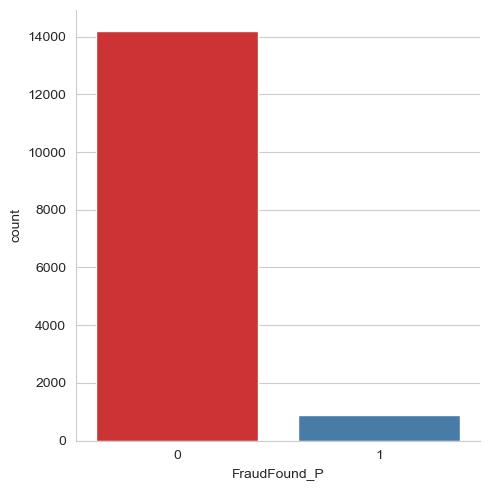

In [136]:
sns.catplot(vehicle_fraud_data['FraudFound_P'].value_counts(), kind='bar', palette='Set1')

In [101]:
X = vehicle_fraud_df.drop(['FraudFound_P'], axis = 1)
Y = vehicle_fraud_df['FraudFound_P']

In [102]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE()
transform_feature, transform_label = smote_sample.fit_resample(X, Y)

6. Cross Validation

In [103]:
cols = list(transform_feature.select_dtypes('bool').columns)

In [104]:
transform_feature[cols] = transform_feature[cols].astype('int')

In [105]:
from sklearn.model_selection import train_test_split
# test_size = 20%, train_size = 80%
x_train, x_test, y_train, y_test = train_test_split(transform_feature, transform_label, test_size=0.2, random_state=0)

7. Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
tree_clf = DecisionTreeClassifier(max_depth=12,criterion='entropy',random_state=0)

In [108]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

In [109]:
tree_clf.score(x_train, y_train)

0.8856237902516276

In [110]:
tree_clf.score(x_test, y_test)

0.8757916959887403

In [111]:
tree_clf.get_depth()

12

8. Plot Decision Tree

In [112]:
!pip install graphviz

In [113]:
import graphviz
from sklearn import tree

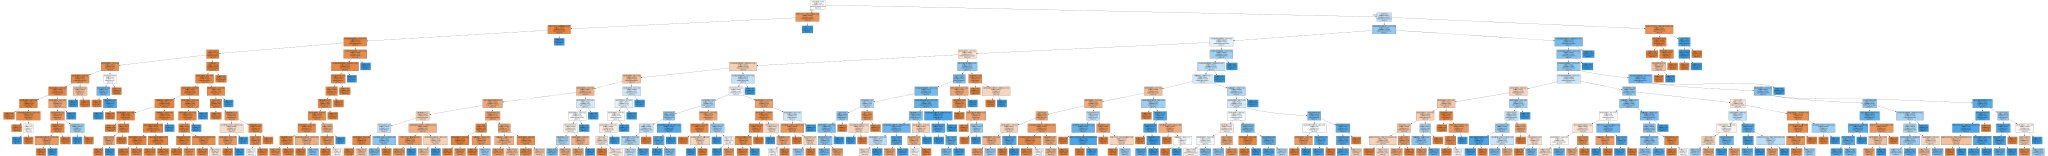

In [114]:
dot_data=tree.export_graphviz(tree_clf,feature_names=x_train.columns, class_names=y_train.astype(str).unique(),filled=True)
graph=graphviz.Source(dot_data,format='png')
graph

In [115]:
graph.render(filename='decision_tree')

'decision_tree.png'

In [116]:
from sklearn.metrics import confusion_matrix,classification_report
prediction=tree_clf.predict(x_test)

<Axes: >

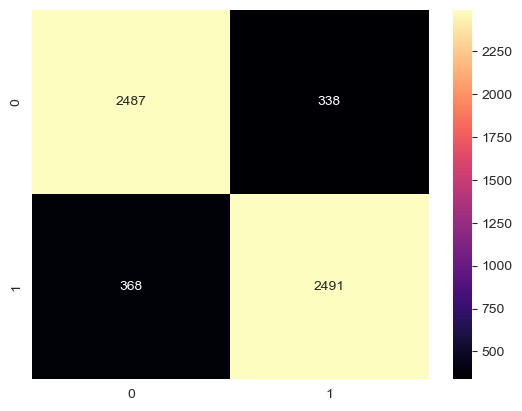

In [117]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt='0.0f',cmap='magma')

In [118]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2825
           1       0.88      0.87      0.88      2859

    accuracy                           0.88      5684
   macro avg       0.88      0.88      0.88      5684
weighted avg       0.88      0.88      0.88      5684



 10. Random forest classifier

In [126]:
from sklearn.ensemble import RandomForestClassifier
#bootstrap=True(random sampling training data), n_estimators=number of decision trees
#max_depth=maximum depth of each 
#max_features=no. of features for random forest sample
rf_clf=RandomForestClassifier(bootstrap=True,n_estimators=50,max_depth=9,max_features=15,random_state=0)

In [127]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, max_features=15, n_estimators=50,
                       random_state=0)

In [128]:
rf_clf.score(x_test,y_test)

0.8900422237860661

In [129]:
rf_clf.score(x_train,y_train)

0.8879992961464015

In [130]:
from sklearn.metrics import confusion_matrix, classification_report
prediction=rf_clf.predict(x_test)

<Axes: >

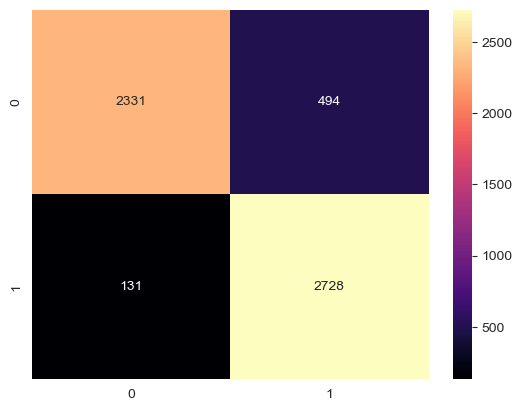

In [131]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True, fmt='0.0f',cmap='magma')

In [132]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2825
           1       0.85      0.95      0.90      2859

    accuracy                           0.89      5684
   macro avg       0.90      0.89      0.89      5684
weighted avg       0.90      0.89      0.89      5684



### New Sample Prediction

In [134]:
new_sample=x_test.sample(1)

In [135]:
rf_clf.predict(new_sample)

array([1])